# TASK 4.10 (C)
# Final Task - Part 2

#### Table of Content

1. Importing Libraries
2. Importing Dataframe
3. Checking the Data
4. Insights on Distribution Profiles


## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 2. Importing Dataframe

In [2]:
path = r'/Users/charliegehant/Dropbox/4. Career Foundry/Achievement 4 - Python Fundamentals for Data Analysts/02-2022 Instacart Basket Analysis'

In [3]:
path

'/Users/charliegehant/Dropbox/4. Career Foundry/Achievement 4 - Python Fundamentals for Data Analysts/02-2022 Instacart Basket Analysis'

In [4]:
# Importing dataframe 'orders_products_customers_departments.pkl'

df_OPCD = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_departments.pkl'))

In [5]:
pd.options.display.max_columns = None

## 3. Checking the Data

In [6]:
df_OPCD.shape

(32435059, 39)

In [7]:
df_OPCD.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,prices,opp_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spender_flag,median_order_freq,order_freq_flag,gender,state,age,date_joined,n_dependants,income,family_status,user_id_merge,region,activity_flag,age_flag,income_flag,dept_id,department,d_id_merge
0,2539329,1,1,2,8,0.0,196,1,0,both,Soda,77.0,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,40423,Married,both,South,Normal activity,30-39,Low earner,7,beverages,both
1,2539329,1,1,2,8,0.0,14084,2,0,both,Organic Unsweetened Vanilla Almond Milk,91.0,12.5,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,40423,Married,both,South,Normal activity,30-39,Low earner,16,dairy eggs,both
2,2539329,1,1,2,8,0.0,12427,3,0,both,Original Beef Jerky,23.0,4.4,both,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,40423,Married,both,South,Normal activity,30-39,Low earner,19,snacks,both
3,2539329,1,1,2,8,0.0,26088,4,0,both,Aged White Cheddar Popcorn,23.0,4.7,both,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,40423,Married,both,South,Normal activity,30-39,Low earner,19,snacks,both
4,2539329,1,1,2,8,0.0,26405,5,0,both,XL Pick-A-Size Paper Towel Rolls,54.0,1.0,both,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,40423,Married,both,South,Normal activity,30-39,Low earner,17,household,both


## 4. Insights on Distribution Profiles

> ##### D6: Create an appropriate visualization to show the distribution of profiles.

### 4a. Age Range

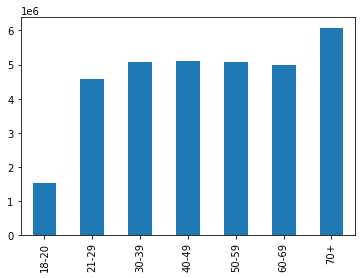

In [8]:
# Creating a bar visualisation of the customers by age range

age_range = df_OPCD['age_flag'].value_counts().sort_index().plot.bar()

In [9]:
# Exporting bar chart

age_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_range.png'))

### 4b. Income Range

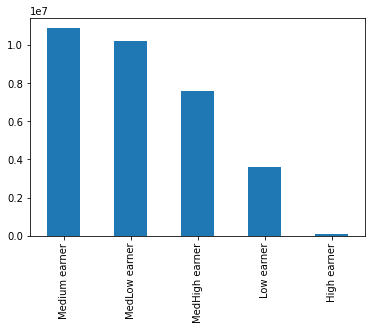

In [10]:
# Creating a bar visualisation of the customers by income range

income_range = df_OPCD['income_flag'].value_counts().plot.bar()

In [11]:
# Exporting bar chart

income_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_range.png'))

### 4c. Age vs Income

In [12]:
# Exploring correlation between age range and income level

crosstab_age_income = pd.crosstab(df_OPCD['age_flag'], df_OPCD['income_flag'], dropna = False)
print(crosstab_age_income)

income_flag  High earner  Low earner  MedHigh earner  MedLow earner  \
age_flag                                                              
18-20               2249      235421           13685        1020542   
21-29              10272      724503           42224        3041333   
30-39               9418      799981           46791        3407976   
40-49              22077      448527         1680555         896041   
50-59              18632      450968         1819715         578268   
60-69              19618      424011         1833189         577863   
70+                19408      514534         2182617         705213   

income_flag  Medium earner  
age_flag                    
18-20               252518  
21-29               753538  
30-39               814037  
40-49              2066844  
50-59              2201565  
60-69              2137461  
70+                2663465  


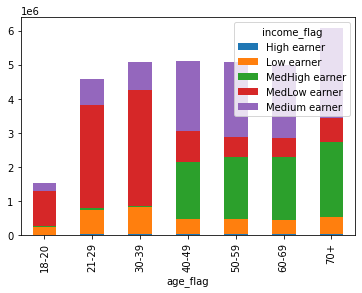

In [13]:
# There is a correlation between age and income status

stackedbar_age_income = crosstab_age_income.plot.bar(stacked = True)

In [14]:
# Exporting bar chart

stackedbar_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stackedbar_age_income.png'))

In [15]:
# Re-indexing the order of income flag (from Low to High)

crosstab_age_income_ind = crosstab_age_income[['Low earner', 'MedLow earner', 'Medium earner', 'MedHigh earner', 'High earner']]

In [16]:
# Checking the result

crosstab_age_income_ind

income_flag,Low earner,MedLow earner,Medium earner,MedHigh earner,High earner
age_flag,,,,,
18-20,235421,1020542,252518,13685,2249
21-29,724503,3041333,753538,42224,10272
30-39,799981,3407976,814037,46791,9418
40-49,448527,896041,2066844,1680555,22077
50-59,450968,578268,2201565,1819715,18632
60-69,424011,577863,2137461,1833189,19618
70+,514534,705213,2663465,2182617,19408


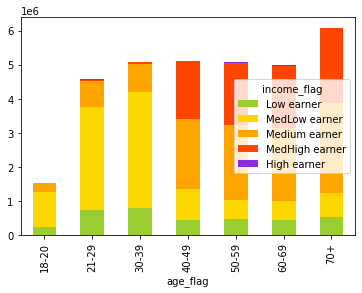

In [17]:
# Creating a stack bar chart with new indexed data and colours

stackedbar_age_income_ind = crosstab_age_income_ind.plot.bar(stacked = True, color = ['yellowgreen', 'gold', 'orange', 'orangered', 'blueviolet'])

In [18]:
# Exporting new stacked bar chart

stackedbar_age_income_ind.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stackedbar_age_income_ind.png'))

### 4d. Price Range

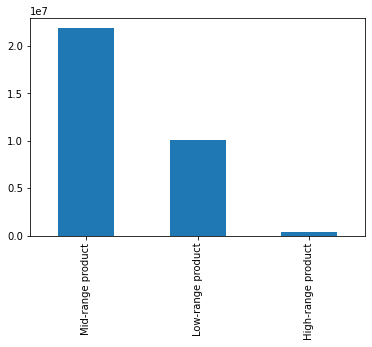

In [19]:
# Back in script 4.7 I created a price flag, here I am making a bar plot out of it

bar_price_range = df_OPCD['price_range_loc'].value_counts().plot.bar()

In [20]:
# Exporting bar chart

bar_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_range.png'))

In [21]:
# Checking the data

df_OPCD['price_range_loc'].value_counts()

Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: price_range_loc, dtype: int64

### 4d. Department Popularity

In [22]:
# Looking if some types of products (department) are more popular than others

df_dept_popularity = df_OPCD[['dept_id', 'department']].value_counts()

In [23]:
# Checking the data

df_dept_popularity

dept_id  department     
4        produce            9479291
16       dairy eggs         5398747
19       snacks             2887550
7        beverages          2688123
1        frozen             2234743
13       pantry             1875369
3        bakery             1172428
15       canned goods       1068058
20       deli               1051249
9        dry goods pasta     866627
17       household           738666
12       meat seafood        708927
14       breakfast           703033
11       personal care       447572
18       babies              423802
6        international       269253
5        alcohol             153696
8        pets                 97716
21       missing              69145
2        other                36291
10       bulk                 34573
dtype: int64

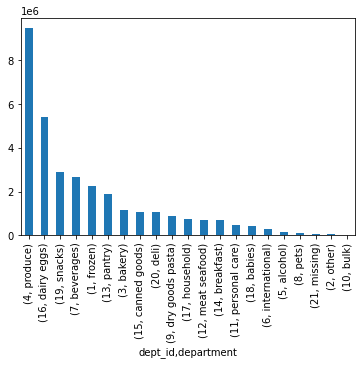

In [24]:
# Creating a bar plot of department popularity

bar_dept_popularity = df_dept_popularity.plot.bar()

In [25]:
# Exporting bar chart

bar_dept_popularity.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_popularity.png'))

### 4e. Ordering Habits by Customer Type

In [26]:
# Isolating top 5 departments

df_top_dept = df_OPCD.loc[df_OPCD['dept_id'].isin(['4','16','19','7','1'])]

In [27]:
# Checking the data

df_top_dept.shape

(22688454, 39)

In [28]:
# Comparing ordering behavior according to custoemr loyalty and department type

crosstab_ordshabit_topdept = pd.crosstab(df_top_dept['loyalty_flag'], df_top_dept['department'], dropna = False)
print(crosstab_ordshabit_topdept)

department        beverages  dairy eggs   frozen  produce   snacks
loyalty_flag                                                      
Loyal customer       855017     1830707   609460  3147376   943150
New customer         512871      971621   485283  1736622   534251
Regular customer    1320235     2596419  1140000  4595293  1410149


<AxesSubplot:xlabel='loyalty_flag'>

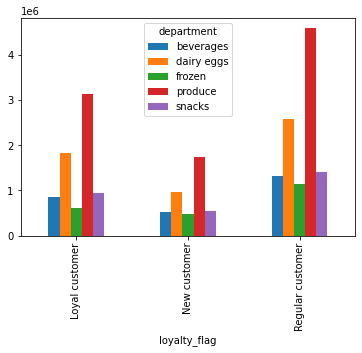

In [29]:
# Creating a bar plot; however it's hard to compare non-normalized results.. 
# Moreover I feel like I could produce a clearer chart by changing the x axis

crosstab_ordshabit_topdept.plot.bar()

In [30]:
# Gathering data to normalize in Excel

df_top_dept['loyalty_flag'].value_counts()

Regular customer    11062096
Loyal customer       7385710
New customer         4240648
Name: loyalty_flag, dtype: int64

In [31]:
# Gathering data to normalize in Excel

crosstab_ordshabit_topdept.to_clipboard()

In [32]:
custhabit = {'departments':['Produce', 'Dairy Eggs', 'Snacks', 'Beverages', 'Frozen'], 
               'Loyal customer':[42.61, 24.79, 12.77, 11.58, 8.25],
               'New customer':[40.95, 22.91, 12.60, 12.09, 11.44],
               'Regular customer':[41.54, 23.47, 12.75, 11.93, 10.31]} 

In [33]:
# Creating a new normalized dataframe

custhabit = pd.DataFrame(custhabit,index=[1,2,3,4,5])

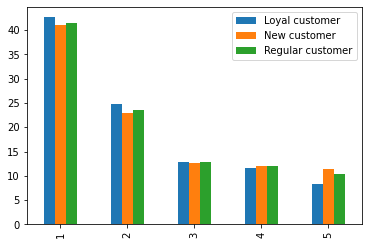

In [34]:
# Creating a bar chart with normalized results
# Now I can compare the purchasing habits of the three customer groups

bar_custhabit = custhabit.plot.bar()

In [35]:
# Exporting bar chart

bar_custhabit.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_custhabit.png'))

### 4f. Age & Family Status

In [36]:
# Exploring correlation between age and family status

crosstab_age_family = pd.crosstab(df_OPCD['age_flag'], df_OPCD['family_status'], dropna = False)
print(crosstab_age_family)

family_status  Divorced/Widowed  Living With Relative  Married   Single
age_flag                                                               
18-20                         0               1162263        0   362152
21-29                         0                389952  3029322  1152596
30-39                         0                     0  3808555  1269648
40-49                         0                     0  3845203  1268841
50-59                         0                     0  3791500  1277648
60-69                   1263684                     0  3728458        0
70+                     1510776                     0  4574461        0


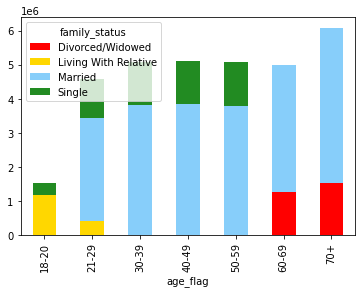

In [37]:
# There is a strong correlation between age and family status

stackedbar_age_family = crosstab_age_family.plot.bar(stacked = True, color = ['red', 'gold', 'lightskyblue', 'forestgreen'])

In [38]:
# Exporting bar chart

stackedbar_age_family.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stackedbar_age_family.png'))

### 4g. Family Status & Ordering Habits

In [39]:
# Creating a crosstab of family status vs orders by department

crosstab_family_ordhabits = pd.crosstab(df_top_dept['family_status'], df_top_dept['department'], dropna = False)
print(crosstab_family_ordhabits)

department            beverages  dairy eggs   frozen  produce   snacks
family_status                                                         
Divorced/Widowed         231025      461911   193575   812834   246796
Living With Relative     124629      260787   108533   449628   137163
Married                 1889052     3788598  1569050  6654218  2029589
Single                   443417      887451   363585  1562611   474002


<AxesSubplot:xlabel='family_status'>

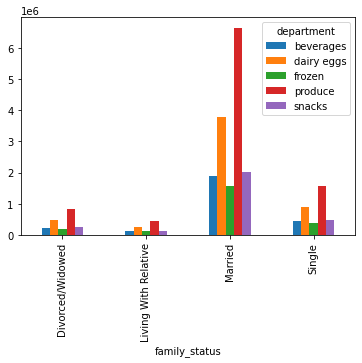

In [40]:
# Creating a bar chart, however, here again it hard to compare non-normalized results

crosstab_family_ordhabits.plot.bar()

In [41]:
# Gathering data to normalize in Excel

crosstab_family_ordhabits.to_clipboard()

In [42]:
# Creating a new normalized dataframe

ordhabit = {'departments':['Produce', 'Dairy Eggs', 'Snack', 'Beverages', 'Frozen'], 
               'Divorced/Widowed':[41.77, 23.73, 12.68, 11.87, 9.95],
               'Living With Relative':[41.60, 24.13, 12.69, 11.53, 10.04],
               'Married':[41.77, 23.78, 12.74, 11.86, 9.85],
              'Single':[41.88, 23.79, 12.70, 11.88, 9.74]} 

In [43]:
# Creating a new normalized dataframe

ordhabit = pd.DataFrame(ordhabit,index=[1,2,3,4,5])

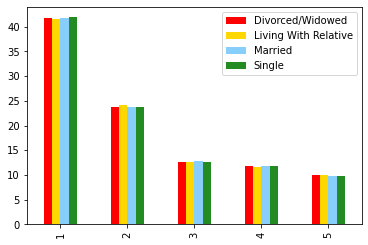

In [44]:
# Creating a bar chart with normalized results
# Now I can compare the purchasing habits of the four family status

bar_ordhabit = ordhabit.plot.bar(color = ['red', 'gold', 'lightskyblue', 'forestgreen'])

In [45]:
# Exporting bar chart

bar_ordhabit.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ordhabit.png'))

### 4h. Family Status & Number of Dependants

In [46]:
# Exploring correlation between family status and number of dependants

crosstab_family_dependants = pd.crosstab(df_OPCD['family_status'], df_OPCD['n_dependants'], dropna = False)
print(crosstab_family_dependants)

n_dependants                0        1        2        3
family_status                                           
Divorced/Widowed      2774460        0        0        0
Living With Relative        0   530629   508546   513040
Married                     0  7557836  7590188  7629475
Single                5330885        0        0        0


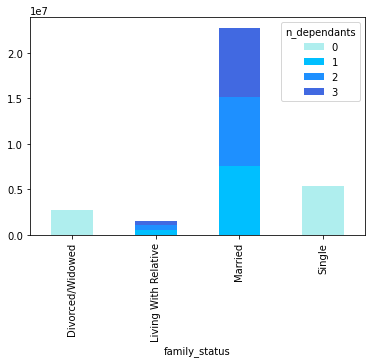

In [47]:
# There is a strong correlation between family status and number of dependants

stackedbar_family_dependants = crosstab_family_dependants.plot.bar(stacked = True, color = ['paleturquoise', 'deepskyblue', 'dodgerblue', 'royalblue'])

In [48]:
# Exporting stackedbar chart

stackedbar_family_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stackedbar_family_dependants.png'))

### 4i. Age & Spender Types

In [49]:
# Exploring correlation between age and spender types
# There seems to be something interesting in the '40-49 + High spender' category

crosstab_age_spender = pd.crosstab(df_OPCD['age_flag'], df_OPCD['spender_flag'], dropna = False)
print(crosstab_age_spender)

spender_flag  High spender  Low spender
age_flag                               
18-20                27348      1497067
21-29                87550      4484320
30-39                96429      4981774
40-49               114405      4999639
50-59                92071      4977077
60-69               101945      4890197
70+                 114930      5970307


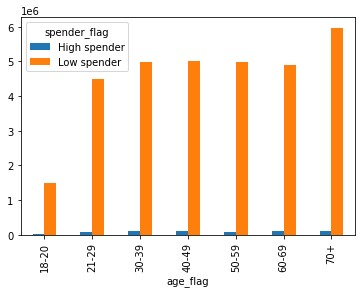

In [50]:
# Creating a stacked bar; the high spenders are drowned/hidden by the low spender

stackedbar_age_spender = crosstab_age_spender.plot.bar()

In [51]:
# Dropping the 'low spender' column to compare high spenders

crosstab_age_spender_high = crosstab_age_spender.drop(columns = ['Low spender'])

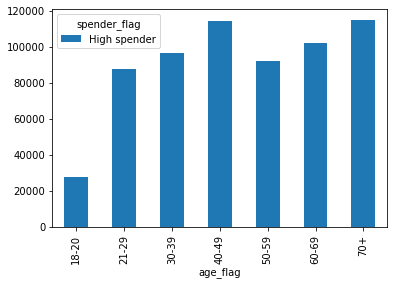

In [52]:
# Creating a bar chart

bar_age_spender_high = crosstab_age_spender_high.plot.bar()

In [53]:
# Exporting bar chart

bar_age_spender_high.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_spender_high.png'))

### 4j. Age & Order Frequency

In [54]:
# Exploring correlation between age and order frequency
# There is a slight peak of frequent customers between 40-49 years

crosstab_age_orderfreq = pd.crosstab(df_OPCD['age_flag'], df_OPCD['order_freq_flag'], dropna = False)
print(crosstab_age_orderfreq)

order_freq_flag  Frequent customer  Non-frequent customer  Regular customer
age_flag                                                                   
18-20                      1072027                 128967            323421
21-29                      3222625                 376980            972265
30-39                      3548446                 422256           1107501
40-49                      3605165                 430403           1078476
50-59                      3568249                 415495           1085404
60-69                      3507111                 418471           1066560
70+                        4292418                 497434           1295385


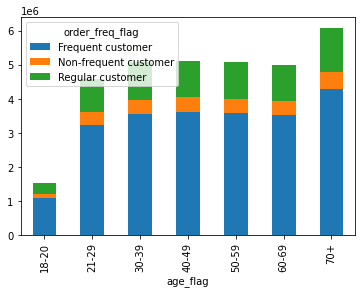

In [55]:
# Creating a stacked bar chart

stackedbar_age_orderfreq = crosstab_age_orderfreq.plot.bar(stacked = True)

In [56]:
# Exporting bar chart

stackedbar_age_orderfreq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stackedbar_age_orderfreq.png'))

### 4k. Age & Regions

In [57]:
# Exploring correlation between age and region

crosstab_age_region = pd.crosstab(df_OPCD['age_flag'], df_OPCD['region'], dropna = False)
print(crosstab_age_region)

region    Midwest  Northeast    South     West
age_flag                                      
18-20      355443     265861   517235   385876
21-29     1066473     805810  1537427  1162160
30-39     1181675     889630  1724542  1282356
40-49     1228206     901072  1678475  1306291
50-59     1200631     891061  1655297  1322159
60-69     1162469     885420  1666028  1278225
70+       1409119    1089590  2022978  1563550


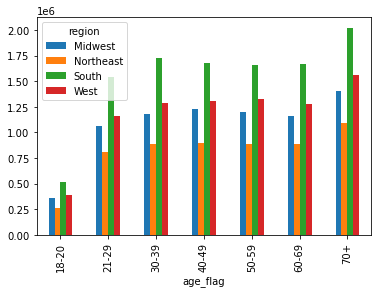

In [58]:
# Creating a bar chart; it's hard to see trends on this scale

bar_age_region = crosstab_age_region.plot.bar()

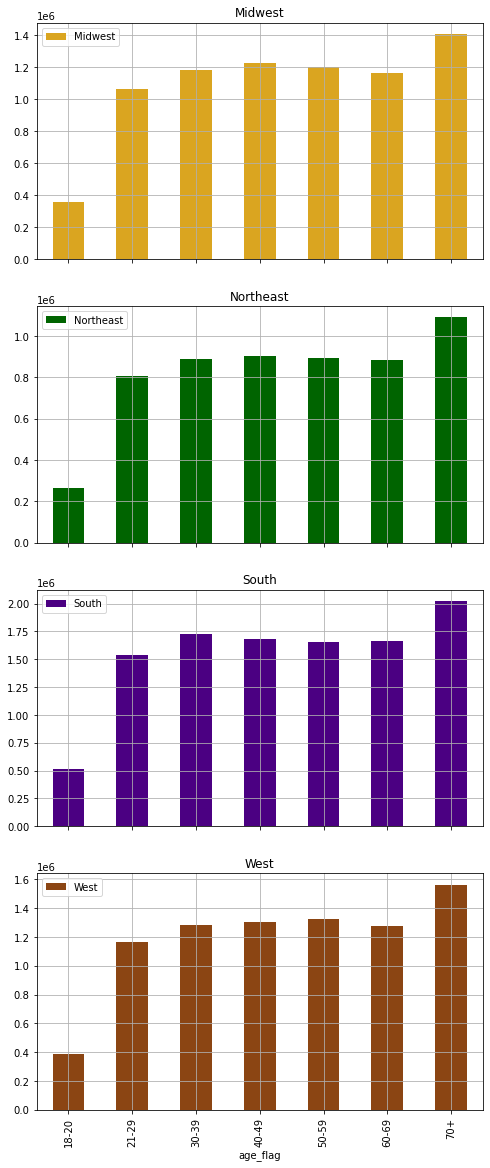

In [59]:
# Separating the regions and adding a grid for greater comparison potential

bar_age_region_sub = crosstab_age_region.plot(kind = 'bar', subplots = True, figsize=(8,20), grid = True, color = ['goldenrod', 'darkgreen', 'indigo', 'saddlebrown'])

### 4l. Age & Department

In [60]:
# Creating a crosstab of age vs orders by department

crosstab_age_ordhabits = pd.crosstab(df_top_dept['age_flag'], df_top_dept['department'], dropna = False)
print(crosstab_age_ordhabits)

department  beverages  dairy eggs  frozen  produce  snacks
age_flag                                                  
18-20          122809      254092  106148   444498  134093
21-29          376734      763909  313365  1330400  410821
30-39          414617      852077  346212  1492532  455142
40-49          425165      854998  350933  1494172  449615
50-59          425090      835589  350476  1477090  455559
60-69          412810      823787  347697  1465118  440014
70+            510898     1014295  419912  1775481  542306


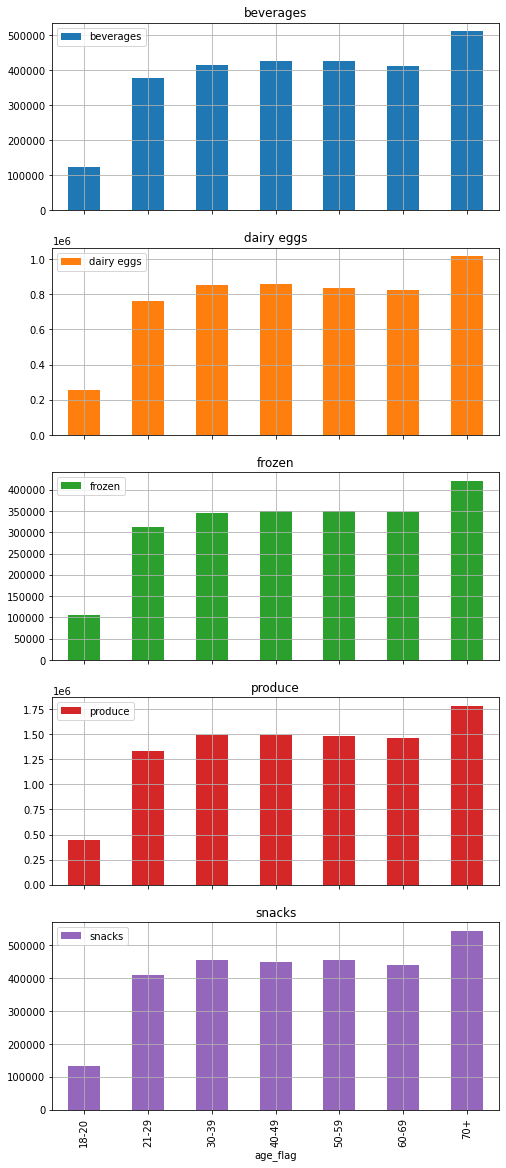

In [61]:
# Creating bar charts 

bar_age_ordhabits = crosstab_age_ordhabits.plot(kind = 'bar', grid = True, subplots = True, figsize=(8,20))

### 4m. Popular Departments & Products

In [91]:
df_OPCD['department'].value_counts()

produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

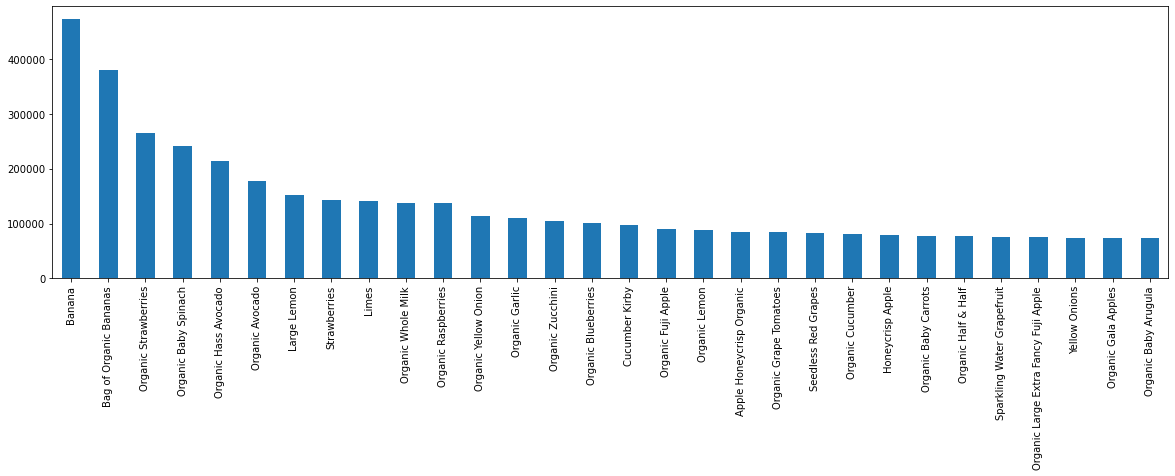

In [106]:
bar_top_products = df_OPCD['product_name'].value_counts().head(30).plot.bar(figsize=(20,5))

In [107]:
# Exporting bar chart

bar_top_products.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_top_products.png'))